1. Es necesario utilizar unicamente los puntos sobre la esfera
que tengan todas sus puntos positivos. Esto porque sino
se obtienen rankings inversos.
2. No hay relacion entre el poset interseccion,
calculado usando los rankings de las puntuaciones,
con el __poset de puntos__
__poset de puntos__ poset que se obtiene al comparar
todas las entradas del vector que representa un nodo.
3. Es necesario mejorar la normalizacion
4. Los 1s del poset de puntos, siempre aparecen en el
poset borroso, calculado utilizando las puntuaciones.

In [1]:
import Distributions: MvNormal

using Posets

using Distributions
using Plots
using LinearAlgebra

using DelimitedFiles

using SparseArrays

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1278
┌ Info: Precompiling Posets [849245fe-9976-4417-8fcb-b00bf8cb81e3]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


# Metodos

In [2]:
function metametodo_poset(metodo, poseto, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x]#=, rev = true=#) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    norm(poseto - poset)
end

metametodo_poset (generic function with 1 method)

In [3]:
function metametodo_posetposicion(metodo, poseto, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x]#=, rev = true=#) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    norm(listaposicionespromedio(poseto) - listaposicionespromedio(poset))
end

metametodo_posetposicion (generic function with 1 method)

In [4]:
function listaposicionespromedio(poset, pasos = 10^3)
    n,_ = size(poset)
    
    randomel = [caminatale(poset, 10^2) for _ in 1:pasos]
    [posicionpromedio(randomel, i) for i in 1:n]
end

listaposicionespromedio (generic function with 2 methods)

In [5]:
corte0p70 = x -> αcut_poset(x |>fuzzy, 0.70)
corte0p80 = x -> αcut_poset(x |>fuzzy, 0.80)
corte0p90 = x -> αcut_poset(x |>fuzzy, 0.90)
corte0p95 = x -> αcut_poset(x |>fuzzy, 0.95)
corte0p98 = x -> αcut_poset(x |>fuzzy, 0.98)

#17 (generic function with 1 method)

In [6]:
mat = [1. .3; .3 1.]
matcesgada = [2.6 2.4; 2.4 2.6]
nmat = [0.01 0.; 0. 0.01]
dimension = 2

2

# Nuevo: analisis de posiciones promedio

## Datos

In [7]:
posetdepuntos, puntuaciones = generapuntuaciones_gaussian(20,7,dimension;matnodos=mat);

## 70

Aquí se compara la distribución de las energías locales cuando se introduce sesgo en los puntos gaussianos.

In [8]:
resultados_sinruido = Float64[]

Float64[]

In [9]:
for _ in 1:10^3
    dimension = 2
    mat = [1. .3; .3 1.]
    posetdepuntos, puntuaciones = generapuntuaciones_gaussian(20,7,dimension;matnodos=mat);
    push!(resultados_sinruido, metametodo_posetposicion(corte0p70, posetdepuntos, puntuaciones, true))
end

In [10]:
resultados_nodosesgo = Float64[]

Float64[]

In [11]:
for _ in 1:10^3
    dimension = 2
    mat = [1. .3; .3 1.]
    posetdepuntos, puntuaciones = generapuntuaciones_gaussian(20,7,dimension;matnodos=matcesgada);
    push!(resultados_nodosesgo, metametodo_posetposicion(corte0p70, posetdepuntos, puntuaciones, true))
end

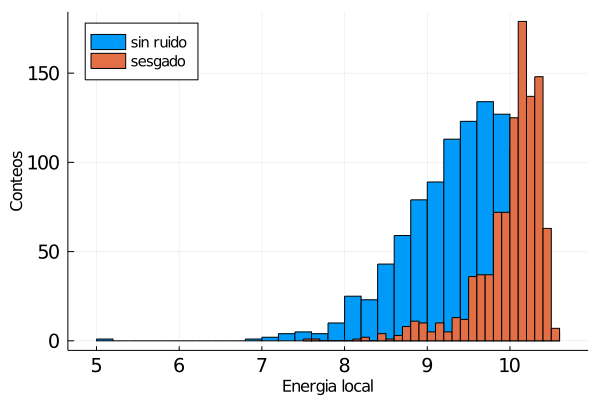

In [12]:
histogram([resultados_sinruido,resultados_nodosesgo],
xtickfontsize=13, ytickfontsize=13,
xlabel="Energia local", ylabel="Conteos",
labels = ["sin ruido" "sesgado"],legend=:topleft,legendfontsize=10)

## 95

In [13]:
resultado_sinruido95 = Float64[]

Float64[]

In [14]:
for _ in 1:10^3
    dimension = 2
    mat = [1. .3; .3 1.]
    posetdepuntos, puntuaciones = generapuntuaciones_gaussian(20,7,dimension;matnodos=mat);
    push!(resultado_sinruido95, metametodo_posetposicion(corte0p95, posetdepuntos, puntuaciones, true))
end

In [15]:
resultado_sesgo95 = Float64[]

Float64[]

In [16]:
for _ in 1:10^3
    dimension = 2
    mat = [1. .3; .3 1.]
    posetdepuntos, puntuaciones = generapuntuaciones_gaussian(20,7,dimension;matnodos=matcesgada);
    push!(resultado_sesgo95, metametodo_posetposicion(corte0p95, posetdepuntos, puntuaciones, true))
end

In [17]:
length.([resultado_sinruido95, resultado_sesgo95])

2-element Array{Int64,1}:
 1000
 1000

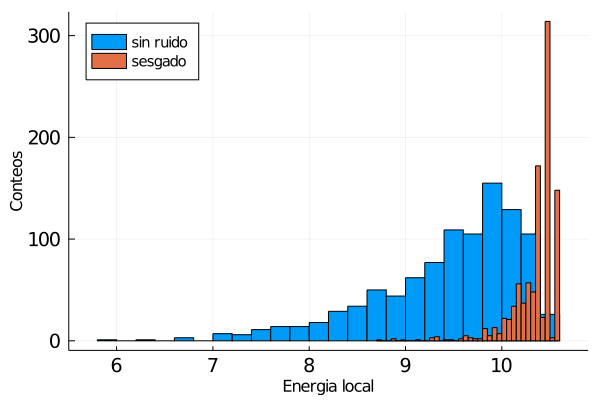

In [18]:
histogram([resultado_sinruido95,resultado_sesgo95],
xtickfontsize=13, ytickfontsize=13,
xlabel="Energia local", ylabel="Conteos",
labels = ["sin ruido" "sesgado"],legend=:topleft,legendfontsize=10)

# Analisis ruido en comparativa [sin ruido]

*atencion* obsoleto desde el cambio de keywords.

Encontré que al introducir ruido en la comparativa, se deja de tener un poset de puntos.

## 70

In [42]:
resutlados_sinruido = Float64[]

Float64[]

In [43]:
for _ in 1:10^3
    dimension = 2
    mat = [1. .3; .3 1.]
    posetdepuntos, puntuaciones = generapuntuaciones_gaussian(20,7,dimension);
    push!(resutlados_sinruido, metametodo_posetposicion(corte0p90, posetdepuntos, puntuaciones, true))
end

In [49]:
resultados_nodosesgo = Float64[]

Float64[]

In [57]:
posetdepuntos

7×7 Array{Int64,2}:
 0  0  0  1  0  0  1
 0  0  0  0  0  0  1
 1  0  0  1  1  0  1
 0  0  0  0  0  0  0
 1  0  1  1  0  0  1
 1  0  1  1  1  0  1
 0  0  0  0  0  0  0

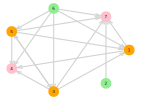

In [56]:
posetdepuntos |> graficacolor

In [52]:
caminatale(posetdepuntos,3)

LoadError: The input graph contains at least one loop.

In [50]:
for _ in 1:10^2
    dimension = 2
    mat = [1. .3; .3 1.]
    posetdepuntos, puntuaciones = generapuntuaciones_gaussian(20,7,dimension;ruido = true, ncovmat = nmat);
    push!(resultados_nodosesgo, metametodo_posetposicion(corte0p90, posetdepuntos, puntuaciones, true))
end

LoadError: The input graph contains at least one loop.

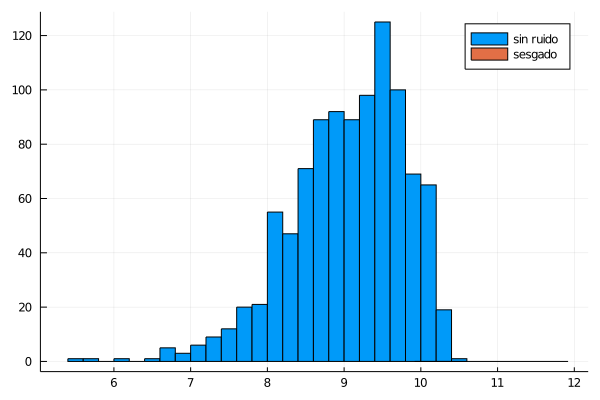

In [36]:
histogram([resutlados_sinruido,resultados_nodosesgo], labels = ["sin ruido" "sesgado"])

# Analisis estadistico [sin ruido]

## Datos

In [7]:
dim = 2
mat = [1. .3; .3 1.]
posetdepuntos, puntuaciones = generapuntuaciones_gaussian(20,7,dim;covmat=mat);

In [37]:
fiasco = Float64[]

Float64[]

In [42]:
for _ in 1:10^4
    dim = 2
    mat = [1. .3; .3 1.]
    posetdepuntos, puntuaciones = generapuntuaciones_gaussian(20,7,dim;covmat=mat);
    push!(fiasco, metametodo_poset(corte0p70, posetdepuntos, puntuaciones, true))
end

In [47]:
fiasco_3 = Float64[]

Float64[]

In [48]:
for _ in 1:10^4
    dim = 2
    mat = [1. .5; .5 1.]
    posetdepuntos, puntuaciones = generapuntuaciones_gaussian(20,7,dim;covmat=mat);
    push!(fiasco_3, metametodo_poset(corte0p70, posetdepuntos, puntuaciones, true))
end

In [43]:
fiasco_2 = Float64[]

Float64[]

In [44]:
for _ in 1:10^4
    dim = 2
    mat = [1. .3; .3 1.]
    posetdepuntos, puntuaciones = generapuntuaciones_gaussian(20,7,dim);
    push!(fiasco_2, metametodo_poset(corte0p70, posetdepuntos, puntuaciones, true))
end

## Presentacion resultados

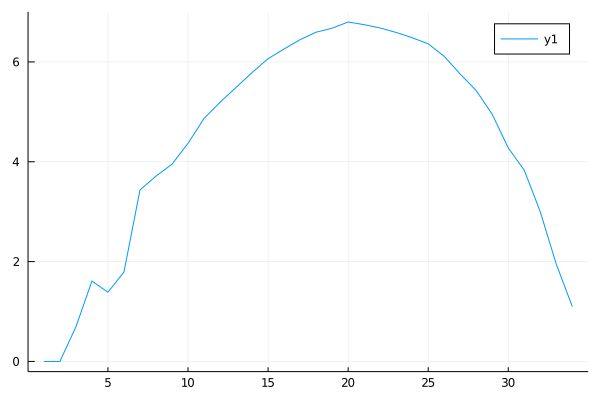

In [53]:
result = countmap(fiasco_2)
plot(log.([result[key] for key in sort(collect(keys(result)))]))

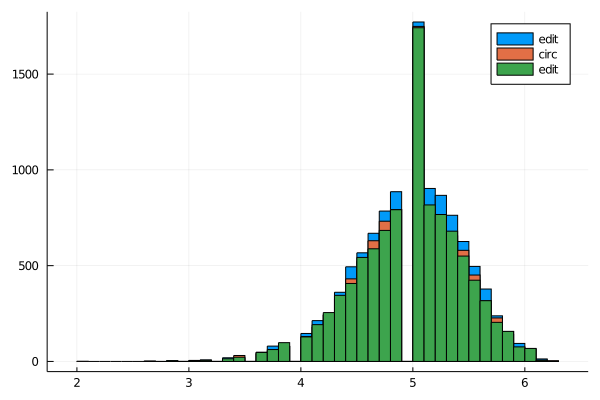

In [49]:
histogram([fiasco, fiasco_2,fiasco_3], labels=["edit" "circ"])

## Conclusiones

1. No hay gran diferencia entre las distribuciones con error
2. La distribucion es gaussiana